In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import FileLink, FileLinks


In [2]:
df = pd.read_csv ("train.csv")
pokemon_label = df ["NameOfPokemon"]
pokemon_label.shape

(304,)

In [3]:
img = cv2.imread ("Images_train/296.jpg")
print (img.shape)

(982, 814, 3)


In [4]:
df.shape


(304, 2)

In [5]:
data = df.values

In [6]:
m = data[0][0]
print (m)

296.jpg


In [7]:
import os
from pathlib import Path
from keras.preprocessing import image


Using TensorFlow backend.


In [8]:
p = Path ("Images_train")
image_data = []
labels = []

for img_path in p.glob ("*.jpg"):
    img = image.load_img (img_path, target_size = (100, 100))
    img_array = image.img_to_array (img)
    image_data.append (img_array)
    temp = str (img_path).split ("/") [-1]
    
    #print (df[0][0])
    #labels.append (label)
    
image_data = np.array (image_data)


/home/dishebh/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [9]:
image_data.shape

(304, 100, 100, 3)

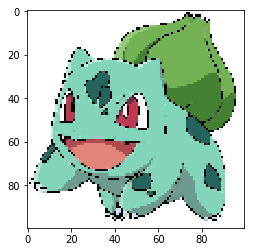

In [10]:
plt.imshow (image_data[6]/255.0)
plt.show ()

In [12]:
sample = (image_data [0]/255.0).reshape (1, 100*100*3)
sample.shape

(1, 30000)

In [13]:
print (sample.shape)
data_frame = pd.DataFrame ()
data_frame ["Pokemon"] = "Pikachu"
print (data_frame ["Pokemon"])

(1, 30000)
Series([], Name: Pokemon, dtype: object)


In [14]:
sample_data_frame = pd.DataFrame ()
sample_data_frame.insert (0, "Pokemon_Name", None)
for i in range (1, 100*100*3 + 1):
    sample_data_frame.insert (i, "Pixel" + str (i), None)
sample_data_frame.shape

(0, 30001)

In [ ]:
for i in range (5):
    for j in range (100*100*3):
       
        
        row_value = image_data [i].reshape (1, 100*100*3)
        sample_data_frame = sample_data_frame.append ({"Pokemon_Name" : pokemon_label [i]}, ignore_index = True)
        sample_data_frame = sample_data_frame.append ({"Pixel" + str (j) : row_value[0][j]}, ignore_index = True)

In [ ]:
sample_data_frame.shape

sample_data_frame.to_csv ("sample_data_frame.csv")
sample_data_frame.to_excel ("sample_data_frame.xlsx")

FileLinks ("/")

In [ ]:
plt.imshow (image_data [1]/255.0)

In [ ]:
Image = cv2.imread ("Images_test/1106.jpg")
Image = image.load_img ("Images_test/1106.jpg", target_size = (100, 100))
print (Image.shape)

In [ ]:
def dist (a1, a2):
    return np.sum((a1 - a2)**2)**.5

In [ ]:
def KNN (X, Y, test_point, k = 5):
    
    m = X.shape[0]
    vals = []
    
    for i in range(m):
        d = dist (X[i], test_point)
        vals.append((d, Y[i]))
        
    vals = sorted (vals)
    vals = np.array (vals[:k])
    b = np.unique (vals[:, 1], return_counts = True)
    idx = np.argmax (b[1])
    
    pred = b[0][idx]
    
    return pred

In [ ]:
X = sample_data_frame [:, 0]
Y = sample_data_frame [:, 1:]

prediction = KNN (X, Y, test_image)

print (prediction)